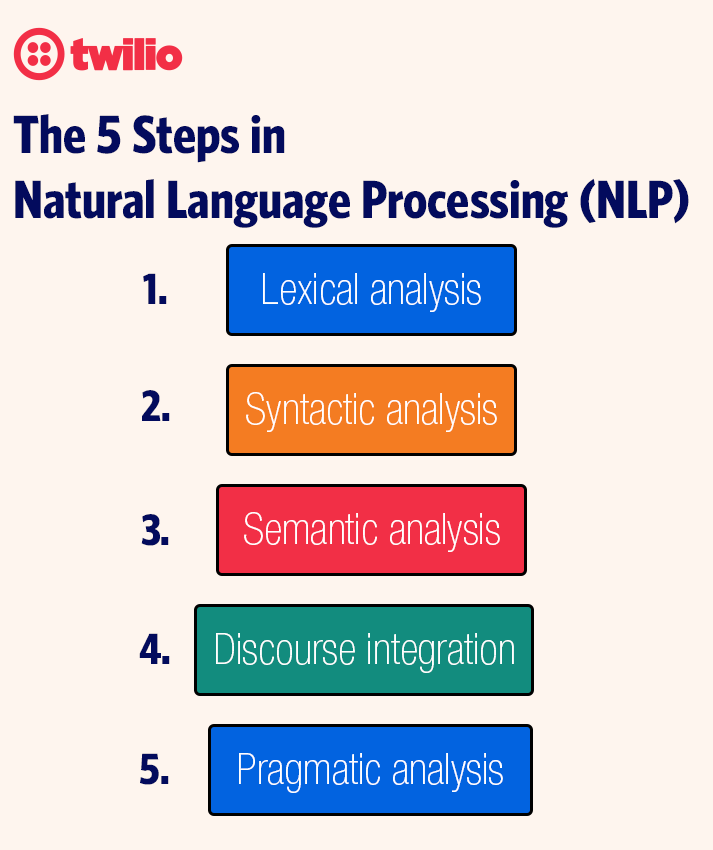

# 1. Lexical analysis
Lexical analysis deciphers and segments language into units—or lexemes—like paragraphs, sentences, phrases, and words. NLP algorithms categorize words into parts of speech (POS) and split lexemes into morphemes—meaningful language units that you can’t further divide. 

There are 2 types of morphemes:

1. Free morphemes function independently as words (like “cow” and “house”).

2. Bound morphemes make up larger words. The word “unimaginable” contains the morphemes “un-” (a bound morpheme signifying a negative context), “imagine” (the free morpheme root of the whole word), and “-able” (a bound morpheme denoting the root morpheme’s ability to end).

   The analysis isolates and divides the first sentence into lexeme phrases, like “the understandable vocabulary that makes up a language.” This analysis further divides the phrase into word lexemes, like “vocabulary” and “language,” categorizing both as noun POS. Then, the analysis derives free morphemes, like “words,” “vocabulary,” and “understand-,” and bound morphemes, like “-able.”

# 2. Syntactic analysis
Syntax describes how a language’s words and phrases arrange to form sentences. Syntactic analysis checks word arrangements for proper grammar.

For instance, the sentence “Dave wrote the paper” passes a syntactic analysis check because it’s grammatically correct. Conversely, a syntactic analysis categorizes a sentence like “Dave do jumps” as syntactically incorrect.

# 3. Semantic analysis
Semantics describe the meaning of words, phrases, sentences, and paragraphs. Semantic analysis attempts to understand the literal meaning of individual language selections, not syntactic correctness. However, a semantic analysis doesn’t check language data before and after a selection to clarify its meaning.

For instance, “Manhattan calls out to Dave” passes a syntactic analysis because it’s a grammatically correct sentence. However, it fails a semantic analysis. Because Manhattan is a place (and can’t literally call out to people), the sentence’s meaning doesn’t make sense.

# 4. Discourse integration
Discourse describes communication between 2 or more individuals. Discourse integration analyzes prior words and sentences to understand the meaning of ambiguous language.

For instance, if one sentence reads, “Manhattan speaks to all its people,” and the following sentence reads, “It calls out to Dave,” discourse integration checks the first sentence for context to understand that “It” in the latter sentence refers to Manhattan.

# 5. Pragmatic analysis
Pragmatism describes the interpretation of language’s intended meaning. Pragmatic analysis attempts to derive the intended—not literal—meaning of language.

For instance, a pragmatic analysis can uncover the intended meaning of “Manhattan speaks to all its people.” Methods like neural networks assess the context to understand that the sentence isn’t literal, and most people won’t interpret it as such. A pragmatic analysis deduces that this sentence is a metaphor for how people emotionally connect with places.

# Normalizing Textual Data in NLP >> NLP Pre-processing

Text Normalization transforms text into a consistent format improves the quality and makes it easier to process in NLP tasks.

Key steps in text normalization includes:

1. Regular Expressions (RE) are sequences of characters that define search patterns.
   
2. Tokenization is a process of splitting text into smaller units called tokens.

3. Lemmatization reduces words to their base or root form.

4. Stemming reduces works to their root by removing suffixes.

5. Stopword removal is a process to remove common words from the document.

6. Parts of Speech (POS) Tagging assigns a part of speech to each word in sentence based on definition and context.

# full_economic_news_articles - real time project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('full_economic_news_articles.csv', encoding='latin1')
df.head()

,relevance,articleid,date,headline,text
0,yes,wsj_398217788,8/14/91,Yields on CDs Fell in the Latest Week,NEW YORK -- Yields on most certificates of dep...
1,no,wsj_399019502,8/21/07,The Morning Brief: White House Seeks to Limit ...,The Wall Street Journal Online</br></br>The Mo...
2,no,wsj_398284048,11/14/91,Banking Bill Negotiators Set Compromise --- Pl...,WASHINGTON -- In an effort to achieve banking ...
3,no,wsj_397959018,6/16/86,Manager's Journal: Sniffing Out Drug Abusers I...,The statistics on the enormous costs of employ...
4,yes,wsj_398838054,10-04-2002,Currency Trading: Dollar Remains in Tight Rang...,NEW YORK -- Indecision marked the dollar's ton...


In [3]:
df.isnull().sum()

relevance    0
articleid    0
date         0
headline     0
text         0
dtype: int64

In [4]:
# we can see that the data is highly imbalanced
df['relevance'].value_counts()

relevance
no          6571
yes         1420
not sure       9
Name: count, dtype: int64

In [5]:
# dropping the data where relevance = not sure
df = df[df.relevance !="not sure"]

# Exploratory Data Analysis

In [6]:
df.shape

(7991, 5)

In [7]:
df.loc[0, 'text']

'NEW YORK -- Yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.</br></br>On small-denomination, or "consumer," CDs sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by Banxquote Money Markets, a Wilmington, Del., information service.</br></br>On three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to Banxquote. Two banks in the Banxquote survey, Citibank in New York and CoreStates in Pennsylvania, are paying less than 5% on threemonth small-denomination CDs.</br></br>Declines were somewhat smaller on five-year consumer CDs, which eased to 7.37% from 7.45%, Banxquote said.</br></br>Yields on three-month and six-month Treasury bills sold at Monday\'s auction plummeted more than a fifth of a percentage po

In [8]:
df.loc[1, 'text']

'The Wall Street Journal Online</br></br>The Morning Brief, a look at the day\'s biggest news, is emailed to subscribers by 7 a.m. every business day. Sign up for the e-mail here.</br></br>On Friday evening, with Congress out of town on its summer recess and Americans heading into a mid-August weekend, the Bush administration sent a message to the states: The federal government will make it tougher for a national children\'s insurance program to cover the offspring of middle-income families.</br></br>The State Children\'s Health Insurance Program was created in 1997 to help children whose families couldn\'t afford insurance but didn\'t qualify for Medicaid, and administration officials tell the New York Times that the changes are aimed at returning the program to its low- income focus and assuring it didn\'t become a replacement for private insurance. Administration point man Dennis Smith wrote to state officials saying there would be new restrictions on the District of Columbia and th

In [9]:
df['relevance'].value_counts(normalize=True)

relevance
no     0.8223
yes    0.1777
Name: proportion, dtype: float64

In [13]:
0.821375+0.177500

0.998875

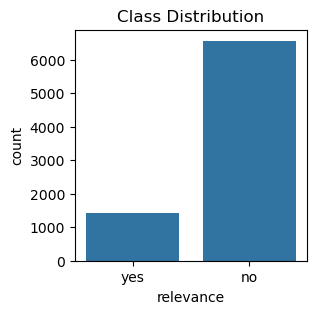

In [10]:
# Visualizing the revelance data
fig, ax = plt.subplots(figsize=(3,3))
ax.set_title('Class Distribution')
sns.countplot(data=df, x='relevance')
plt.show()

In [16]:
#" ".join(df['text'].values)

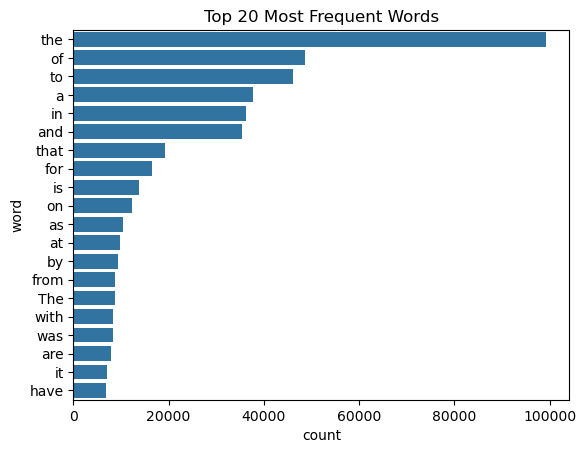

In [13]:
# Visualizing the distribution of most frequent words
from collections import Counter
all_words = " ".join(df['text'].values).split() # df['text'].values give list of text values, then the list of text is joined with join " " space and finally the whole text is split in list of words.
word_counts = Counter(all_words)# Counter function is used to find the frequency of words in dictionary form - {'word': frequency}
common_words = word_counts.most_common(20)
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])
sns.barplot(data=common_words_df, x='count', y='word')
plt.title("Top 20 Most Frequent Words")
plt.show()

In [17]:
from wordcloud import WordCloud
wc = WordCloud(width=1600,height=800).generate(' '.join(df['text']))

In [18]:
#!pip install wordcloud

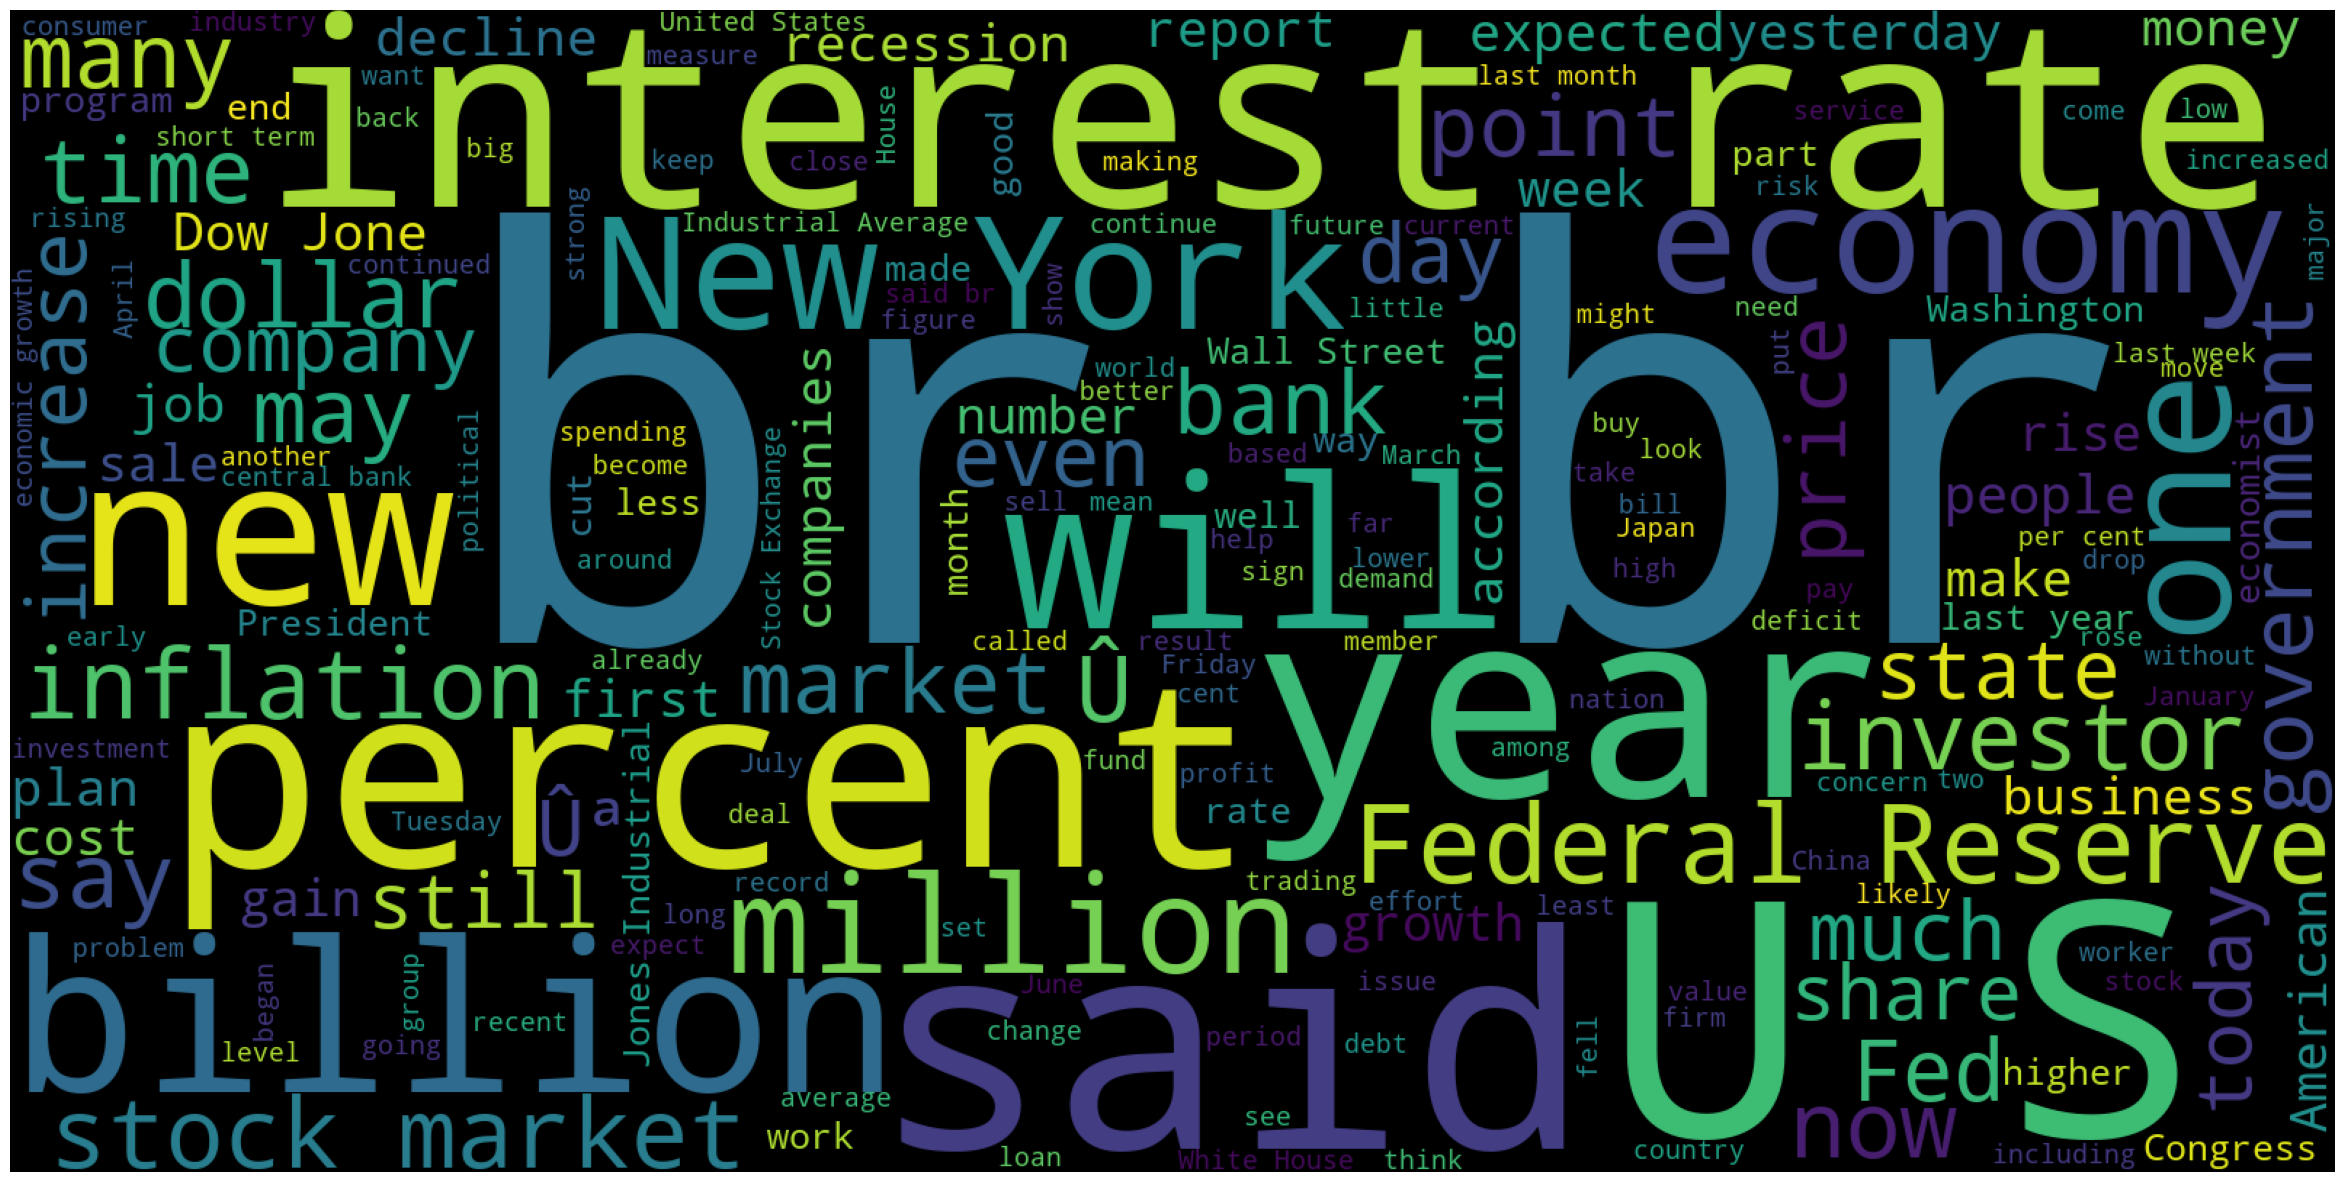

In [19]:
plt.figure(1, figsize=(30,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [20]:
# Removing the data where we don't want relevance  = "not sure"
df['relevance'] = df.relevance.map({'yes':1, 'no':0})
df = df[['text','relevance']]
df.head()

,text,relevance
0,NEW YORK -- Yields on most certificates of dep...,1
1,The Wall Street Journal Online</br></br>The Mo...,0
2,WASHINGTON -- In an effort to achieve banking ...,0
3,The statistics on the enormous costs of employ...,0
4,NEW YORK -- Indecision marked the dollar's ton...,1


In [21]:
df['relevance'].value_counts()

relevance
0    6571
1    1420
Name: count, dtype: int64

In [22]:
df.shape

(7991, 2)

In [23]:
# Segregate inputs(x) and output(y)
from sklearn.model_selection import train_test_split
x = df.text
y = df.relevance

In [24]:
x.head()

0    NEW YORK -- Yields on most certificates of dep...
1    The Wall Street Journal Online</br></br>The Mo...
2    WASHINGTON -- In an effort to achieve banking ...
3    The statistics on the enormous costs of employ...
4    NEW YORK -- Indecision marked the dollar's ton...
Name: text, dtype: object

In [25]:
y.head()

0    1
1    0
2    0
3    0
4    1
Name: relevance, dtype: int64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42, stratify=y)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(5593,) (2398,)
(5593,) (2398,)


# Apply Data Preparation on Training data

In [27]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [28]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
x[0]

'NEW YORK -- Yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.</br></br>On small-denomination, or "consumer," CDs sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by Banxquote Money Markets, a Wilmington, Del., information service.</br></br>On three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to Banxquote. Two banks in the Banxquote survey, Citibank in New York and CoreStates in Pennsylvania, are paying less than 5% on threemonth small-denomination CDs.</br></br>Declines were somewhat smaller on five-year consumer CDs, which eased to 7.37% from 7.45%, Banxquote said.</br></br>Yields on three-month and six-month Treasury bills sold at Monday\'s auction plummeted more than a fifth of a percentage po

In [30]:
def clean(doc):
    doc = doc.replace("</br>", " ")
    # remove the punctuation marks and numbers
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    # To apply more powerful cleaning, use regex
    # tokenization
    tokens = nltk.word_tokenize(doc)
    # Lemmatization
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # stop words removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]
    # join and return
    return " ".join(filtered_tokens)
    

In [35]:
# Bag of Words
#import time
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(preprocessor=clean)
# use it to extract features from training data
x_train_dtm = vect.fit_transform(x_train)
print()
print(f"Shape of x_train_transform (# of docs, # of unique vocabulary): {x_train_dtm.shape}")
print(f"Type of x_train_transform (i.e. compressed sparse row (CSR) format): {type(x_train_dtm)}")
print(f"Vocabulary learned : {vect.get_feature_names_out()[1000:1050]}")


Shape of x_train_transform (# of docs, # of unique vocabulary): (5593, 44776)
Type of x_train_transform (i.e. compressed sparse row (CSR) format): <class 'scipy.sparse._csr.csr_matrix'>
Vocabulary learned : ['Aura' 'Aurora' 'Aussie' 'Austan' 'Austenite' 'Austin' 'Australasia'
 'Australia' 'Australian' 'Australias' 'Austria' 'Austrian'
 'Austrianbased' 'Author' 'AuthorAffiliation' 'Authoritarian'
 'Authorities' 'Authority' 'Authorizing' 'Authors' 'Auto' 'AutoNation'
 'AutoTrain' 'Autobiography' 'Automakers' 'Automated' 'Automation'
 'Automobile' 'Automotive' 'Autonomy' 'Autonomys' 'Autos' 'AuåÇust'
 'Availability' 'Available' 'Avalon' 'Avas' 'Avastin' 'Avatar' 'Avco'
 'AvcoC' 'Avcos' 'Ave' 'Avenue' 'Average' 'Averages' 'Avery' 'Avi'
 'Aviation' 'Avila']


In [36]:
#import nltk
#nltk.download('punkt_tab')

In [37]:
x_test_dtm = vect.transform(x_test)
print(x_test_dtm.shape)

(2398, 44776)


In [38]:
# Building Machine Learning Algorithm
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
%time nb.fit(x_train_dtm, y_train)
y_pred_train = nb.predict(x_train_dtm)
y_pred_test = nb.predict(x_test_dtm)

CPU times: total: 15.6 ms
Wall time: 12 ms


In [39]:
from sklearn.metrics import classification_report, accuracy_score
print(metrics.classification_report(y_train, y_pred_train))
print()
print(metrics.classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90      4599
           1       0.55      0.76      0.64       994

    accuracy                           0.85      5593
   macro avg       0.75      0.81      0.77      5593
weighted avg       0.87      0.85      0.86      5593


              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1972
           1       0.38      0.44      0.41       426

    accuracy                           0.77      2398
   macro avg       0.63      0.65      0.64      2398
weighted avg       0.79      0.77      0.78      2398



In [40]:
print(metrics.accuracy_score(y_train, y_pred_train))
print()
print(metrics.accuracy_score(y_test, y_pred_test))

0.8464151618094046

0.7748123436196831


In [41]:
# Building Machine Learning Algorithm
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
%time rf.fit(x_train_dtm, y_train)
y_pred_train = rf.predict(x_train_dtm)
y_pred_test = rf.predict(x_test_dtm)
from sklearn.metrics import classification_report, accuracy_score
print(metrics.classification_report(y_train, y_pred_train))
print()
print(metrics.classification_report(y_test, y_pred_test))
print()
print(metrics.accuracy_score(y_train, y_pred_train))
print()
print(metrics.accuracy_score(y_test, y_pred_test))

CPU times: total: 17.8 s
Wall time: 22.5 s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4599
           1       1.00      1.00      1.00       994

    accuracy                           1.00      5593
   macro avg       1.00      1.00      1.00      5593
weighted avg       1.00      1.00      1.00      5593


              precision    recall  f1-score   support

           0       0.82      1.00      0.90      1972
           1       0.00      0.00      0.00       426

    accuracy                           0.82      2398
   macro avg       0.41      0.50      0.45      2398
weighted avg       0.68      0.82      0.74      2398


0.9998212050777758

0.8211009174311926


In [42]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(rf, x_train_dtm, y_train, cv=10)
print(training.mean())
print()
print(metrics.accuracy_score(y_test, y_pred_test))

0.8213841681574239

0.8211009174311926
